<img src="https://raw.githubusercontent.com/sebastianVP/sebastianVP/main/toulouselautrec_logo.jpg" alt= "LOGO CAT" width=400 height=400 align = "right">

<br>
<h1><font color="#7F000E" size=5>TOULOUSE LAUTREC </font></h1>
<h1><font color="#7F000R" size=6> DATA SCIENCE MACHINE LEARNING</font></h1>
<h1><font color="#7F000E" size=4> ANALISIS DE DATOS CON PYTHON
 </font></h1>
<br>
<br>
<div style="text-align:left">
<font color="#7F000E" size=3> Ing. Alexander Valdez</font><br>
<font color="#7F000E" size=3> Curso 2271, Clases Lunes y Miercoles 20:00-22:30pm </font><br>
<font color="#7F000e" size=3> Quinta Sesión - 3</font><br>
</div>

# **EJEMPLO DE REGRESION MULTIPLE LINEAL**
Dataset
* Horas trabajadas
* Horas descanso
* Productos terminados
* Semana

In [ ]:
#Librerias
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import r2_score
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [ ]:
#Importar datos
df = pd.read_excel("datos_producción.xlsx")
df.head()

,Semana,Horas Trabajadas,Horas Descanso,Productos Terminados
0,1,42,2,28.925481
1,2,45,3,30.570058
2,3,30,2,21.132880
3,4,33,2,21.798530
4,5,33,3,19.343444


In [ ]:
df.describe()

,Semana,Horas Trabajadas,Horas Descanso,Productos Terminados
count,50.00000,50.000000,50.000000,50.000000
mean,25.50000,39.820000,2.520000,24.841927
std,14.57738,6.918446,0.504672,3.845425
min,1.00000,30.000000,2.000000,18.282029
25%,13.25000,33.250000,2.000000,21.471647
50%,25.50000,39.000000,3.000000,25.239806
75%,37.75000,46.750000,3.000000,28.196098
max,50.00000,50.000000,3.000000,32.451980


In [ ]:
df.drop(['Semana'],axis=1,inplace=True)

In [ ]:
df.corr()

,Horas Trabajadas,Horas Descanso,Productos Terminados
Horas Trabajadas,1.000000,0.173480,0.888975
Horas Descanso,0.173480,1.000000,0.072765
Productos Terminados,0.888975,0.072765,1.000000


In [ ]:
#Seleccionar variables
x1 = "Horas Trabajadas"
x2 = "Horas Descanso"
y = "Productos Terminados"

In [ ]:
#Crear resultados
variables_x = [x1, x2]
variable_y = y
np.array(df[variables_x]).shape
#np.array( df[variable_y]).shape

(50, 2)

In [ ]:
modelo = LinearRegression()# generamos la regresión lineal
modelo.fit(df[variables_x], df[variable_y])# entrenamos el modelo
print ('Coeficientes: ', modelo.coef_) #obtenemos los coeficientes de las variables independientes
print ('Intercepción: ', modelo.intercept_) #obtenemos la intercepción

# y=  mx +b  regresion lineal simple
# y= [coef1 coef2][x1.x2] + intercepto
# y=  coef1*x1 + coef2*x2 + intercepto


Coeficientes:  [ 0.50221005 -0.63991539]
Intercepción:  6.456509255157648


In [ ]:
# Cálculo de R-cuadrado
# de la parte de entrenamiento -rmse
X= df[variables_x]
y= df[variable_y]
r2 = round(modelo.score(X, y),2)
print(f"Coeficiente de determinación (R-cuadrado): {r2}")

Coeficiente de determinación (R-cuadrado): 0.8


In [ ]:
# Se hace predicciones del modelo
from sklearn.metrics import mean_squared_error, r2_score



y_pred = modelo.predict(X)
mse = mean_squared_error(y, y_pred)
print(f"Error Cuadrático Medio (MSE): {mse}")

Error Cuadrático Medio (MSE): 2.940073977775006


Ecuación del plano: y = 0.502 * Horas Trabajadas + -0.64 * Horas de Descanso + 6.457
Coeficiente de determinación:  0.797


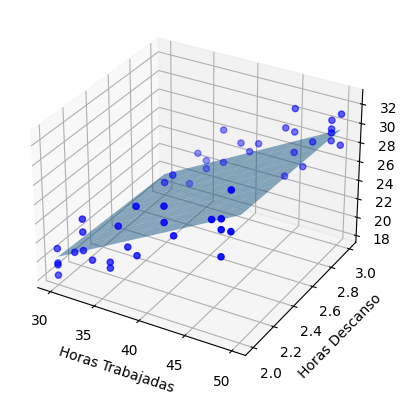

In [ ]:

# Imprimir la ecuación del plano
print('Ecuación del plano: y = {} * Horas Trabajadas + {} * Horas de Descanso + {}'.format(round(modelo.coef_[0], 3), round(modelo.coef_[1], 3), round(modelo.intercept_, 3)))
print ('Coeficiente de determinación: ', round(r2_score(df[variable_y], modelo.predict(df[variables_x])), 3))

# Gráfica en 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df[x1], df[x2], df[y], color='blue')
# Crear un meshgrid para el plano
x = np.linspace(df[x1].min(), df[x1].max(), num=10)
y = np.linspace(df[x2].min(), df[x2].max(), num=10)
x, y = np.meshgrid(x, y)
# Calcular los valores z (Autos Producidos) del plano
z = modelo.intercept_ + modelo.coef_[0] * x + modelo.coef_[1] * y
# Graficar el plano
ax.plot_surface(x, y, z, alpha=0.5)
ax.set_xlabel(x1)
ax.set_ylabel(x2)
ax.set_zlabel("Autos")
plt.show()

In [ ]:
# Generar predicción

horas_trabajadas_nuevas = 15
horas_descanso_nuevas = 3

prediccion_nueva = pd.DataFrame({x1: [horas_trabajadas_nuevas], x2: [horas_descanso_nuevas]})
autos_producidos_prediccion = modelo.predict(prediccion_nueva)
print('La predicción de productos producidos para', horas_trabajadas_nuevas, 'horas trabajadas y', horas_descanso_nuevas, 'horas de descanso es', round(autos_producidos_prediccion[0], 3))

La predicción de productos producidos para 15 horas trabajadas y 3 horas de descanso es 12.07
